In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [2]:
from google.colab import files
uploaded = files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [5]:
df = pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y %H:%M")
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


Index(['date', 'Ex_rate'], dtype='object')


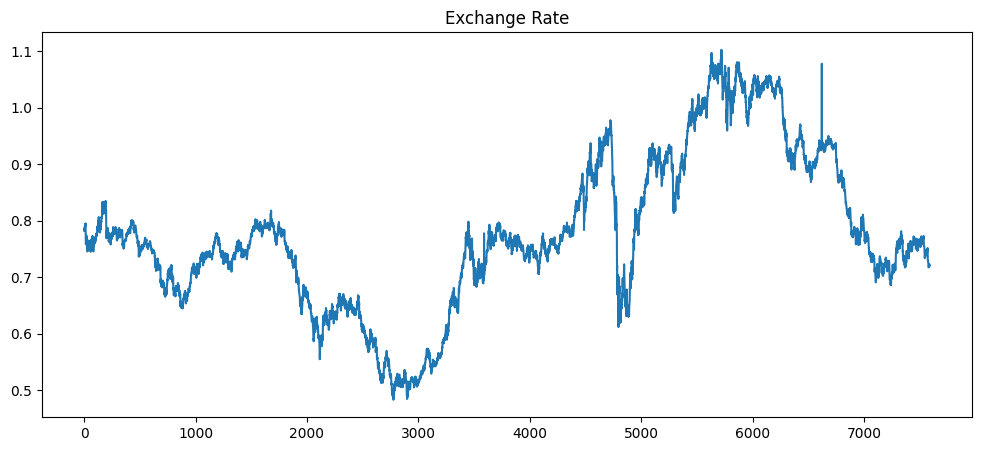

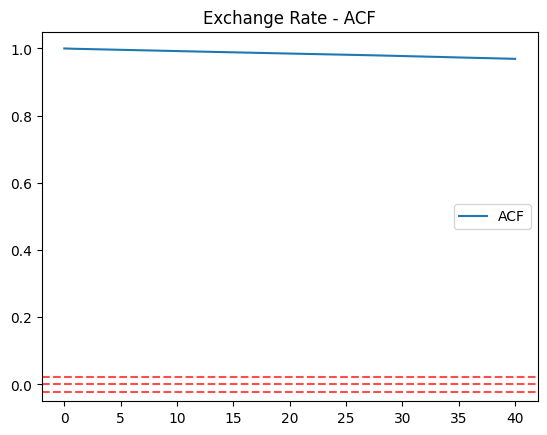

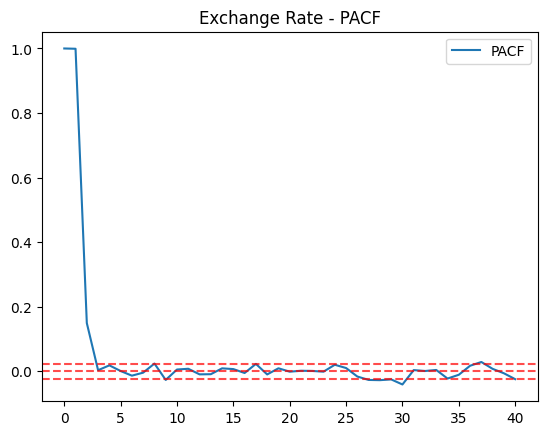

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ts_acf_pacf(series_name, data):
  data.plot(figsize=(12, 5), title=series_name)
  plt.show()
  plt.plot(acf(data, nlags=40), label="ACF")
  plt.axhline(y=0, color="red", linestyle="--", alpha=0.7)
  plt.axhline(
      y=2 / np.sqrt(len(data)), color="red", linestyle="--", alpha=0.7
  )
  plt.axhline(y=-2 / np.sqrt(len(data)), color="red", linestyle="--", alpha=0.7)
  plt.legend()
  plt.title(f"{series_name} - ACF")
  plt.show()
  plt.plot(pacf(data, nlags=40), label="PACF")
  plt.axhline(y=0, color="red", linestyle="--", alpha=0.7)
  plt.axhline(
      y=2 / np.sqrt(len(data)), color="red", linestyle="--", alpha=0.7
  )
  plt.axhline(
      y=-2 / np.sqrt(len(data)), color="red", linestyle="--", alpha=0.7
  )
  plt.legend()
  plt.title(f"{series_name} - PACF")
  plt.show()
print(df.columns)


plot_ts_acf_pacf("Exchange Rate", df["Ex_rate"])



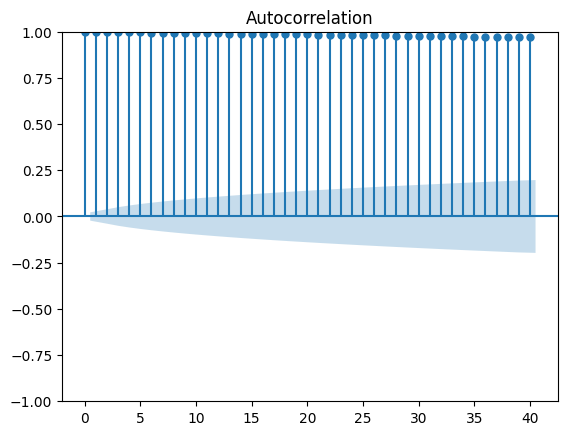

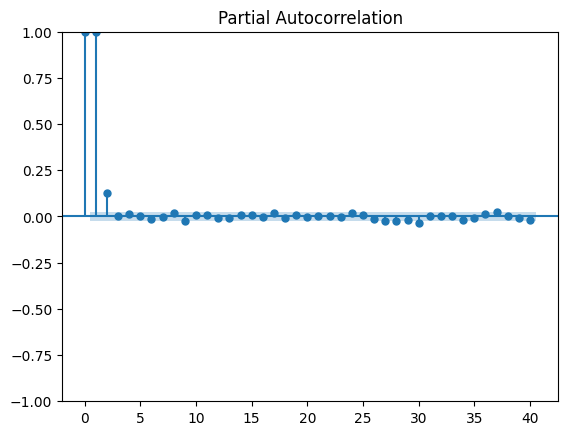

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Ex_rate'],lags=40)
tsa_plots.plot_pacf(df['Ex_rate'],lags=40)

plt.show()

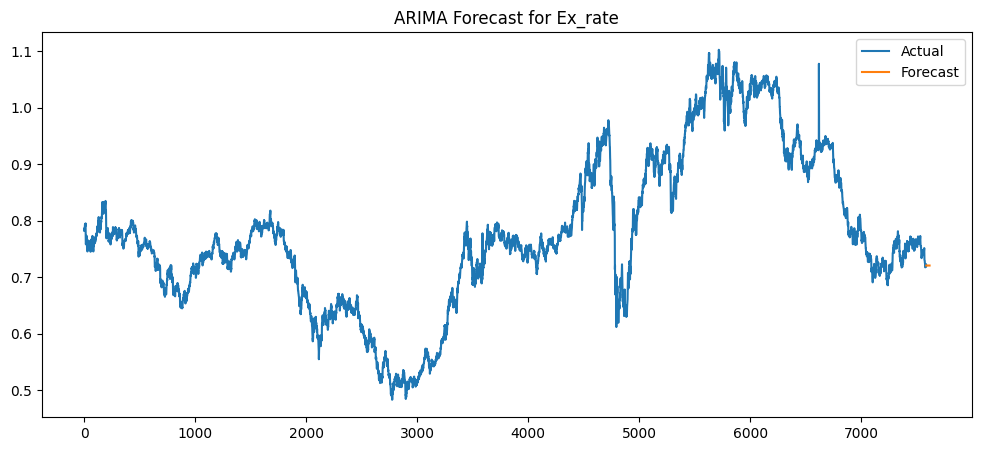

In [9]:
def arima_forecast(currency, data):

  p, d, q = 1, 1, 1
  model = ARIMA(data, order=(p, d, q))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=30)
  data.plot(figsize=(12, 5), label="Actual")
  forecast.plot(label="Forecast")
  plt.legend()
  plt.title(f"ARIMA Forecast for {currency}")
  plt.show()

for col in df.columns[1:]:
  arima_forecast(col, df[col])




In [10]:

def es_forecast(currency, data, model_type):
  if model_type == "simple":
    model = SimpleExpSmoothing(data)
  elif model_type == "holt":
    model = Holt(data)
  else:
    model = ExponentialSmoothing(
        data, trend="additive", seasonal="additive", seasonal_periods=12
    )
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=30)
  data.plot(figsize=(12, 5), label="Actual")
  forecast.plot(label="Forecast")
  plt.legend()
  plt.title(f"{model_type.capitalize()} Smoothing Forecast for {currency}")
  plt.show()





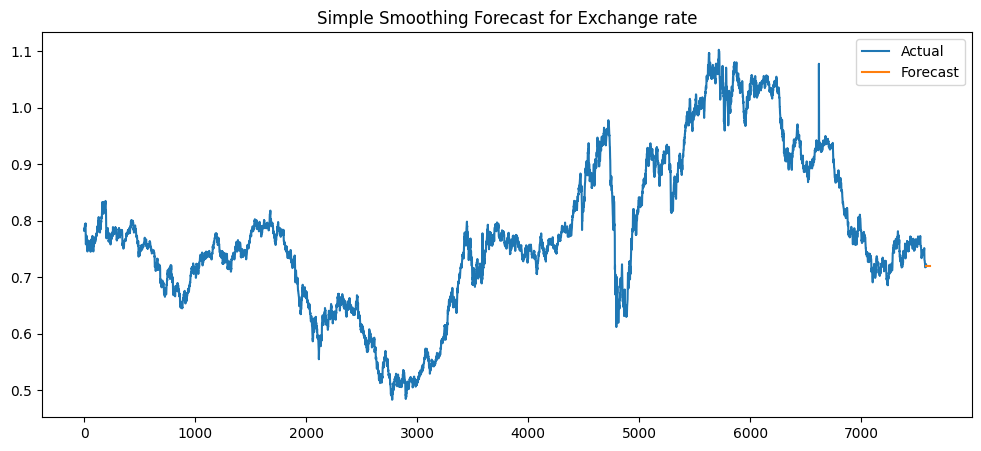

In [11]:
es_forecast("Exchange rate", df["Ex_rate"], "simple")

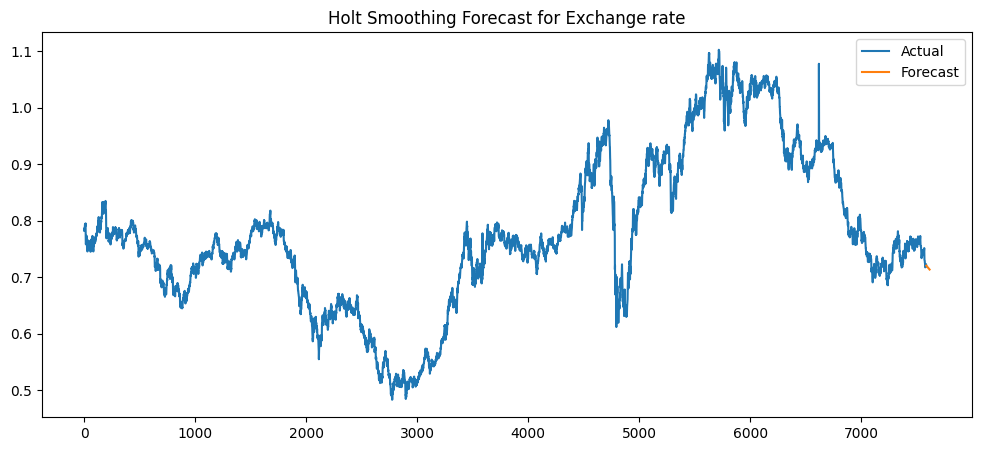

In [12]:
es_forecast("Exchange rate", df["Ex_rate"], "holt")

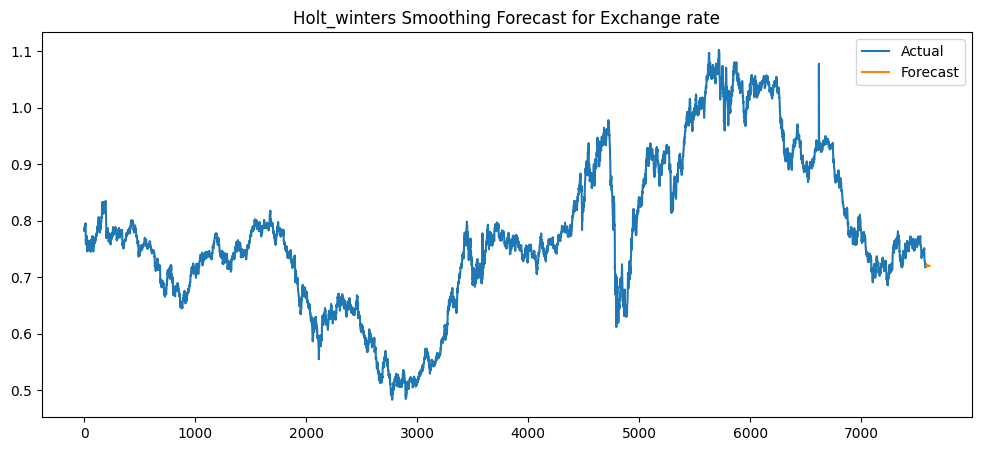

In [13]:
es_forecast("Exchange rate", df["Ex_rate"], "holt_winters")

In [14]:
# Splitting data
print(len(df['Ex_rate']))
train=df.head(6070)
test=df.tail(1518)


7588


In [15]:
train

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
6065,2006-08-10,1.022620
6066,2006-08-11,1.027591
6067,2006-08-12,1.022349
6068,2006-08-13,1.023395


In [16]:
test.shape

(1518, 2)

In [20]:
ses_model = SimpleExpSmoothing(train["Ex_rate"]).fit(smoothing_level=1)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Ex_rate)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0.17355907835213152

In [21]:
hw_model = Holt(train["Ex_rate"]).fit(smoothing_level=0.9, smoothing_slope=0.1)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Ex_rate)

<ipython-input-21-fd29cf239670>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Ex_rate"]).fit(smoothing_level=0.9, smoothing_slope=0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0.4618168080257563